Write a program to evaluate AND function with bipolar inputs and targets and also show the convergence curves and the decision boundary lines.

Final Weights: [-0.2  0.2  0.2]


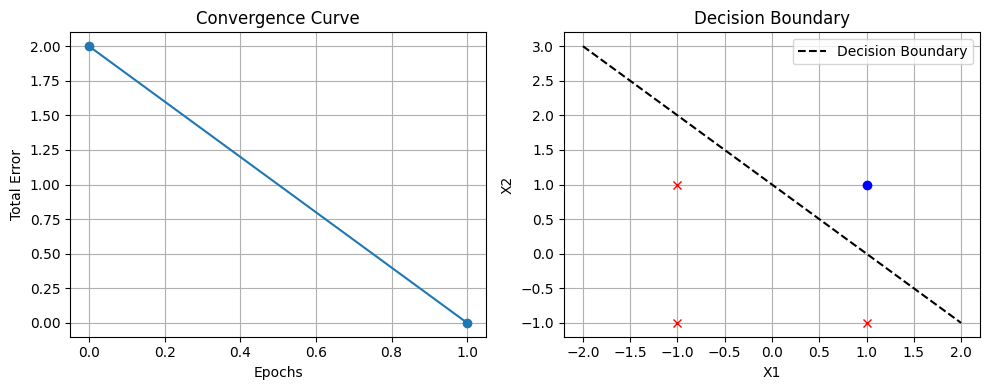

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bipolar AND function data
X = np.array([[-1, -1],
              [-1,  1],
              [ 1, -1],
              [ 1,  1]])
T = np.array([-1, -1, -1, 1])  # Targets

# Add bias term to inputs
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias as first column

# Parameters
epochs = 20
lr = 0.1  # Learning rate
weights = np.zeros(X_bias.shape[1])  # [bias, w1, w2]

# Activation function
def bipolar_step(x):
    return 1 if x >= 0 else -1

# Training
errors = []
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_bias)):
        net_input = np.dot(weights, X_bias[i])
        output = bipolar_step(net_input)
        error = T[i] - output
        weights += lr * error * X_bias[i]
        total_error += abs(error)
    errors.append(total_error)
    if total_error == 0:
        break

print("Final Weights:", weights)

# Plotting convergence curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(errors, marker='o')
plt.title("Convergence Curve")
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.grid(True)

# Plotting decision boundary
plt.subplot(1, 2, 2)
for i in range(len(X)):
    if T[i] == 1:
        plt.plot(X[i][0], X[i][1], 'bo')  # Blue for class +1
    else:
        plt.plot(X[i][0], X[i][1], 'rx')  # Red for class -1

# Decision boundary: w0 + w1*x1 + w2*x2 = 0 → x2 = -(w0 + w1*x1)/w2
x_vals = np.linspace(-2, 2, 100)
y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.title("Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Write a program to evaluate X-OR function and also show the
convergence and the decision boundary.

Final weights:
 [[-1.34]
 [ 1.34]
 [ 1.34]
 [-1.34]]
Final MSE: 9.25549360913917e-07
Final output:
 [[-1.]
 [ 1.]
 [ 1.]
 [-1.]]


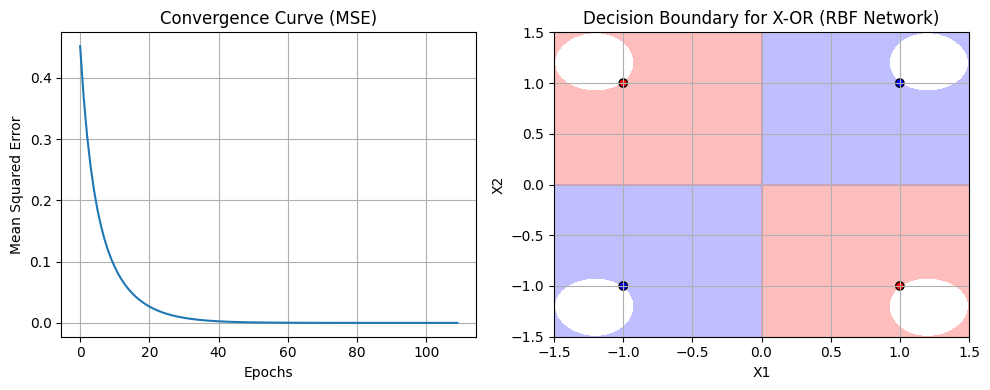

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Input data and targets (bipolar X-OR)
X = np.array([[-1, -1],
              [-1,  1],
              [ 1, -1],
              [ 1,  1]])
T = np.array([[-1], [1], [1], [-1]])

# Radial Basis Function
def gaussian_rbf(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c) ** 2 / (2 * sigma ** 2))

# Build RBF layer output for all samples
def compute_rbf_layer(X, centers, sigma):
    G = np.zeros((X.shape[0], len(centers)))
    for i, x in enumerate(X):
        for j, c in enumerate(centers):
            G[i, j] = gaussian_rbf(x, c, sigma)
    return G

# Parameters
sigma = 1.0
lr = 0.1
epochs = 500
centers = X.copy()  # Set centers as input points

# Initialize output weights randomly
weights = np.random.randn(len(centers), 1)

# Training loop
mse_list = []
for epoch in range(epochs):
    # Forward pass
    G = compute_rbf_layer(X, centers, sigma)
    output = G @ weights

    # Error and MSE
    error = T - output
    mse = np.mean(error ** 2)
    mse_list.append(mse)

    # Gradient descent update
    weights += lr * G.T @ error

    if mse < 1e-6:
        break

print("Final weights:\n", np.round(weights, 2))
print("Final MSE:", mse)
print("Final output:\n", np.round(output, 2))

# Plot convergence curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(mse_list)
plt.title("Convergence Curve (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)

# Plot decision boundary
plt.subplot(1, 2, 2)
x1_vals = np.linspace(-1.5, 1.5, 100)
x2_vals = np.linspace(-1.5, 1.5, 100)
xx, yy = np.meshgrid(x1_vals, x2_vals)
grid = np.c_[xx.ravel(), yy.ravel()]
G_grid = compute_rbf_layer(grid, centers, sigma)
Z = G_grid @ weights
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='bwr', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=T.flatten(), cmap='bwr', edgecolors='k')
plt.title("Decision Boundary for X-OR (RBF Network)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

Implement the SGD Method using Delta learning rule for following input-target sets.10

Xinput= [ 0 0 1; 0 1 1;1 0 1; 1 1 1], Dtarget = [ 0; 0; 1; 1]

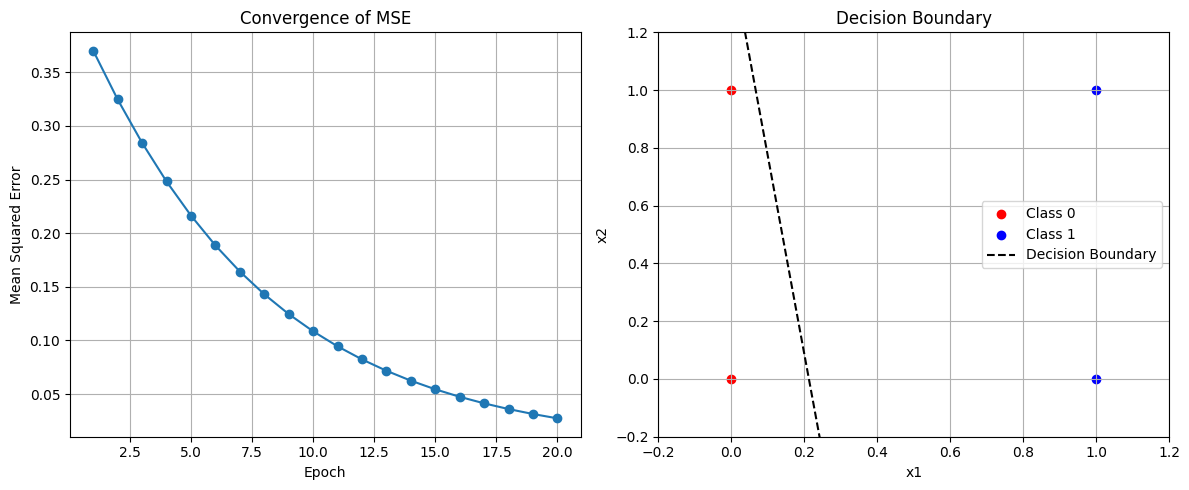

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs and targets
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

D = np.array([[0],
              [0],
              [1],
              [1]])

# Initialize weights
# W = np.random.randn(3, 1)
W = np.array([[ 1.9189432],
    [ 0.614925],
    [-0.956587]])
# Learning rate and epochs
eta = 0.1
epochs = 20

# For storing MSE
mse_list = []

# Training using SGD and Delta rule
for epoch in range(epochs):
    epoch_error = 0
    for i in range(len(X)):
        x = X[i].reshape(3, 1)
        d = D[i]
        y = np.dot(W.T, x)
        e = d - y
        W += eta * e * x
        epoch_error += e**2
    mse = epoch_error / len(X)
    mse_list.append(mse.item())

# ---- Plotting ----
plt.figure(figsize=(12, 5))

# Plot 1: MSE convergence
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), mse_list, marker='o')
plt.title('Convergence of MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Plot 2: Decision boundary
plt.subplot(1, 2, 2)
# Extract inputs (ignore bias)
X_no_bias = X[:, :2]

# Separate classes
class_0 = X_no_bias[D[:, 0] == 0]
class_1 = X_no_bias[D[:, 0] == 1]

# Plot data points
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')

# Decision boundary line
# W: [w1, w2, bias], so: w1*x1 + w2*x2 + b = 0
# Solve for x2: x2 = -(w1*x1 + b)/w2
w1, w2, b = W[0, 0], W[1, 0], W[2, 0]
x_vals = np.array([0, 1])
y_vals = -(w1 * x_vals + b) / w2
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.title('Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()